In [1]:
import pandas as pd
import numpy as np

# Set the maximum number of displayed columns to None (show all columns)
pd.set_option('display.max_columns', None)

In [2]:
# Read in data of responese
df = pd.read_csv("Blank Quiz (Responses) - Form Responses 1.csv")
df.head(10)

Timestamp Name your favorite thing to do in the snow.  \
0  10/29/2023 20:15:48                                Build a fort   
1  10/29/2023 20:32:47                                Make snowmen   
2  10/29/2023 20:34:32                                      Skiing   
3  10/29/2023 20:50:14                                      Shovel   
4  10/29/2023 21:35:36                        Nothing, Stay Inside   
5  10/29/2023 22:46:06                                      Wonder   
6   10/30/2023 5:11:52                                 Snow angels   
7   10/30/2023 7:10:24                       Have a snowball fight   
8   10/30/2023 7:35:41                              Have hot cocoa   
9  10/30/2023 10:10:28                                         Ski   

  Name another name for Santa.  \
0                   Saint nick   
1                   Saint Nick   
2                     St. Nick   
3                      St Nick   
4                   Saint Nick   
5             Father Christmas   
6                 Kris Kringle   
7                 Kris Kringle   
8                   Saint Nick   
9                      At Nick   

  Name a strange place to see someone dressed up as Santa.  \
0                                           Funeral          
1                                          A Museum          
2                                      The bathroom          
3                                        A corn maze         
4                                       The Bathroom         
5                                             Temple         
6                                   A haunted house          
7                                         At church          
8                                              Sauna         
9                                                Bar         

  It’s not Christmas until I watch:  \
0                   Christmas story   
1                   The Santa Cause   
2                   Christmas carol   
3                 A Christmas carol   
4        The Muppet Christmas Carol   
5                    My sanity fade   
6                  White Christmas    
7                           Scrooge   
8                        Home Alone   
9                   Christmas Story   

  Name one of Santa’s reindeer that you would like to spend time with.  \
0                                            Blitzen                     
1                                             Dasher                     
2                                            Rudolph                     
3                                              Vixen                     
4                                            Blitzen                     
5                                             Dancer                     
6                                             Dancer                     
7                                            Rudolf                      
8                                              Comet                     
9                                            Rudolph                     

  Name something Santa would like for Christmas.  \
0                                  Seat cushion    
1                                         Gloves   
2                                    A night off   
3                                      A day off   
4                                           Rest   
5                                        Veggies   
6                                        A break   
7                                 Peace on earth   
8                             Tropical vacation    
9                                           Rest   

  Name the worst present to open on Christmas day.  \
0                                            Socks   
1                                              NaN   
2                                        Underwear   
3                                   Someone else’s   
4                                             Coal   
5                                        U

In [3]:
# Create a dictionary to map original column names to shorter names
column_mapping = {
   	"Timestamp": "Date",	
    "Name your favorite thing to do in the snow.": "q1", 	
    "Name another name for Santa.":	"q2", 
    "Name a strange place to see someone dressed up as Santa.": "q3", 	
    "It’s not Christmas until I watch:": "q4", 	
    "Name one of Santa’s reindeer that you would like to spend time with.": "q5", 	
    "Name something Santa would like for Christmas.": "q6",	
    "Name the worst present to open on Christmas day.": "q7",	
    "Name Santa’s favorite cookie.": "q8", 	
    "Name Santa’s second favorite snack (after cookies and milk)": "q9",
    "Name one of Santa’s reindeer that might be called the class clown.": "q10"	,
    "Name a part of Santa’s suit."	: "q11",
    "Name a word that has the word “snow” in it.":"q12",	
    "Name someone you would buy a Christmas gift for.":	"q13",
    "When do you start decorating for Christmas?": "q14",	
    "Name a song Santa might use for his ringtone.": "q15",
    "Name a type of music Santa might listen to on Christmas night while he delivers gifts.": "q16",	
    "Name an image you might find on Christmas wrapping paper.": "q17",
    "Name a gift from “the twelve days of Christmas.”": "q18",	
    "Name something you need for wrapping gifts.": "q19",	
    "Name something Santa might do to disguise himself.": "q20",
    "Name the most difficult present to wrap.": "q21",
    "Name a popular Christmas Eve tradition.": "q22",	
    "Name something on every mom’s Christmas list.": "q23",	
    "Name something you might start doing on December 1?": "q24",	
    "Name a job that might require someone to work on Christmas day.": "q50",
    "Name a way to greet someone at Christmas.": "q25",	
    "Name something you might smell at Christmas.": "q26",	
    "How many weeks before Christmas should you send out your Christmas cards?": "q27",	
    "What is your favorite thing to do on Christmas day?": "q28",	
    "Name a place that might be open on Christmas day.": "q29",	
    "Name something that should be at every Christmas party.": "q59",	
    "Name a piece of the nativity set.": "q30",	
    "Name something you can find at the North Pole.": "q31",	
    "Name someone Santa might invite to his birthday party.": "q32",
    "After delivering presents on Christmas, Santa probably:": "q33",	
    "Name the hardest person to buy a Christmas present for.": "q34",	
    "Name something Santa might brag about.": "q35",	
    "Name something you might decorate at Christmas.": "q36",	
    "Name something Mrs. Claus might leave the North Pole to escape from.": "q37",	
    "Name someone who was at the first Christmas in Bethlehem.": "q38",	
    "Name a song a group of carolers might sing.": "q39",	
    "Name a popular Christmas dessert.": "q40",	
    "Name a Christmas story parents might read to their kids.": "q41",	
    "Name something that is red and white.": "q41",	
    "Name some activities you might do if you ever went on a date with Santa.": "q42",	
    "If Santa drove his sleigh on the freeway, name something he might be pulled over for.": "q43",	
    "Name something you might leave out on Christmas Eve.": "q44",	
    "Santa wouldn’t be able to work next year if he found he was allergic to:": "q45",	
    "If Santa was back in the dating scene, name something he would need to update.": "q46",	
    "Name something people complain about at Christmas.": "q47",	
    "Name something people do the day after Christmas.": "q48",	
    "Name a holiday song you are tired of by Christmas.": "q49",
    "We all know the Grinch stole Christmas. Name another holiday he might want to steal.": "q51",	
    "Name something you put on the Christmas tree.": "q52",	
    "Name something Mrs. Claus might do while Santa is delivering gifts.": "q53",	
    "Name something to put in your hot chocolate.": "q54",	
    "Name a place you might hide Christmas gifts.": "q55",	
    "If Santa caught the flu, who would deliver the Christmas gifts?": "q56",	
    "Name a candy that is mostly available at Christmas time.": "q57",	
    "It’s officially Christmas season when…": "q58",
}

# Rename the columns using the dictionary
df.rename(columns=column_mapping, inplace=True)

# Display the DataFrame with the renamed columns
df.head(10)

Date                     q1                q2  \
0  10/29/2023 20:15:48           Build a fort        Saint nick   
1  10/29/2023 20:32:47           Make snowmen        Saint Nick   
2  10/29/2023 20:34:32                 Skiing          St. Nick   
3  10/29/2023 20:50:14                 Shovel           St Nick   
4  10/29/2023 21:35:36   Nothing, Stay Inside        Saint Nick   
5  10/29/2023 22:46:06                 Wonder  Father Christmas   
6   10/30/2023 5:11:52            Snow angels      Kris Kringle   
7   10/30/2023 7:10:24  Have a snowball fight      Kris Kringle   
8   10/30/2023 7:35:41         Have hot cocoa        Saint Nick   
9  10/30/2023 10:10:28                    Ski           At Nick   

                 q3                          q4       q5                  q6  \
0          Funeral              Christmas story  Blitzen       Seat cushion    
1         A Museum              The Santa Cause   Dasher              Gloves   
2     The bathroom              Christmas carol  Rudolph         A night off   
3       A corn maze           A Christmas carol    Vixen           A day off   
4      The Bathroom  The Muppet Christmas Carol  Blitzen                Rest   
5            Temple              My sanity fade   Dancer             Veggies   
6  A haunted house             White Christmas    Dancer             A break   
7        At church                      Scrooge  Rudolf       Peace on earth   
8             Sauna                  Home Alone    Comet  Tropical vacation    
9               Bar             Christmas Story  Rudolph                Rest   

               q7                  q8                  q9      q10   q11  \
0           Socks  Girl scout cookies        Protein bars    Comet  Belt   
1             NaN       Sugar Cookies             Carrots   Dancer   Hat   
2       Underwear               Sugar  Cake and ice cream  Rudolph   Hat   
3  Someone else’s       Auger cookie              Egg nog   Dancer   Hat   
4            Coal        Sugar Cookie                 Pie  Rudolph   Hat   
5       Underwear      Snicker doodle             Veggies  Rudolph  Belt   
6          A bill      Sugar cookies         Candy canes   Blitzen   Hat   
7            None       Snickerdoodle              Orange   Rudolf   Hat   
8       Underwear         Gingerbread           Broccoli   Blitzen   Hat   
9           Socks        Sugar cookie           Chocolate  Prancer   Hat   

          q12         q13                      q14  \
0   Snowboard      Spouse  Day after Thanksgiving    
1     Snowman         Mom             November 2nd   
2    Snowman          Mom            Black Friday    
3  Snowflake       Friend                  Nov 1st   
4  Snowblower      Spouse   Day After Thanksgiving   
5     Snowman       Child      After thanksgiving    
6     Snowcap    Your Dad      After Thanksgiving    
7     Snowman  Our family   Day after thanksgiving   
8    Snowball        Kids      After Thanksgiving    
9  Snow globe     Husband     Thanksgiving weekend   

                               q15                        q16          q17  \
0                     Jimgle bells                  Hard rock        Candy   
1   Santa Claus is Coming to Town                         NaN        Santa   
2  All I want for Christmas is you              Rock and roll  Candy canes   
3                     Jingle bells               Classic rock        Elves   
4                     Jingle Bells  Trans-Siberian Orchestra    Candy Cane   
5   Santa clause is coming to town                        Pop         Snow   
6    Santa Claus is Coming to Town               Jingle Bells  Santa Claus   
7         Dashing through the snow                 Wrap music  Santa claus   
8   Santa Claus is coming to town                   Hard rock      Snowman   
9                     Jingle bells                      Hymns        Stars   

                          q18            q19                           q20  \
0              5 GOLDEN RINGS 

In [4]:
df.drop("Date", axis=1, inplace=True)
df.head()

q1          q2             q3  \
0          Build a fort  Saint nick       Funeral    
1          Make snowmen  Saint Nick      A Museum    
2                Skiing    St. Nick  The bathroom    
3                Shovel     St Nick    A corn maze   
4  Nothing, Stay Inside  Saint Nick   The Bathroom   

                           q4       q5             q6              q7  \
0             Christmas story  Blitzen  Seat cushion            Socks   
1             The Santa Cause   Dasher         Gloves             NaN   
2             Christmas carol  Rudolph    A night off       Underwear   
3           A Christmas carol    Vixen      A day off  Someone else’s   
4  The Muppet Christmas Carol  Blitzen           Rest            Coal   

                   q8                  q9      q10   q11         q12     q13  \
0  Girl scout cookies        Protein bars    Comet  Belt   Snowboard  Spouse   
1       Sugar Cookies             Carrots   Dancer   Hat     Snowman     Mom   
2               Sugar  Cake and ice cream  Rudolph   Hat    Snowman      Mom   
3       Auger cookie              Egg nog   Dancer   Hat  Snowflake   Friend   
4        Sugar Cookie                 Pie  Rudolph   Hat  Snowblower  Spouse   

                       q14                              q15  \
0  Day after Thanksgiving                      Jimgle bells   
1             November 2nd   Santa Claus is Coming to Town    
2            Black Friday   All I want for Christmas is you   
3                  Nov 1st                     Jingle bells   
4   Day After Thanksgiving                     Jingle Bells   

                         q16          q17                 q18            q19  \
0                  Hard rock        Candy      5 GOLDEN RINGS           Tape   
1                        NaN        Santa  Five golden rings            Tape   
2              Rock and roll  Candy canes      5 golden rings           Tape   
3               Classic rock        Elves        5 Gold rings  Scotched tape   
4  Trans-Siberian Orchestra    Candy Cane      5 Golden Rings           Tape   

                            q20                                 q21  \
0                         Shave                   Weird shaped ones   
1  Wear a different color suit                                 Love   
2               Shave his beard                          Kitchenaid   
3                         Shave                             Bicycle   
4    Cover Himself in Coal Dust  Anything Not Square or Rectangular   

                    q22              q23                      q24        q50  \
0     Opening presents               Mug              Decorating       Nurse   
1      Telling stories               NaN              Decorating      Retail   
2  Read Christmas story            A nap  Playing Christmas music     Doctor   
3        Read Nativity   Minced meat pie           Wrapping gifts  Military    
4           Watch Movie          Clothes        Decorate the Tree      Nurse   

                q25           q26                    q27  \
0          Hidee ho  Gingerbread                       4   
1   Happy holidays    Peppermint                       3   
2  Merry Christmas       Cinnamon  What Christmas cards?   
3     Felix Navidad     Cinnamon                       3   
4      Good Tidings          Pine                      1   

                                                 q28                  q29  \
0                                     Open presents   Chinese restaurant    
1                            Spend time with family              Walmart    
2                                       Visit family              Walmart   
3               Watch everyone else unwrap presents                  7-11   
4  Watch people open the gifts I picked out for them         Soup Kitchen   

       q59            q30       q31           q32          q33  \
0   Treats         Donkey     Elves       Krampus       Sleeps   
1      NaN         Manger     Snow      The elves  G

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   q1      128 non-null    object
 1   q2      124 non-null    object
 2   q3      123 non-null    object
 3   q4      126 non-null    object
 4   q5      125 non-null    object
 5   q6      125 non-null    object
 6   q7      125 non-null    object
 7   q8      125 non-null    object
 8   q9      126 non-null    object
 9   q10     127 non-null    object
 10  q11     126 non-null    object
 11  q12     128 non-null    object
 12  q13     126 non-null    object
 13  q14     126 non-null    object
 14  q15     122 non-null    object
 15  q16     126 non-null    object
 16  q17     128 non-null    object
 17  q18     126 non-null    object
 18  q19     126 non-null    object
 19  q20     123 non-null    object
 20  q21     125 non-null    object
 21  q22     127 non-null    object
 22  q23     124 non-null    ob

In [6]:
df.fillna("NA", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   q1      131 non-null    object
 1   q2      131 non-null    object
 2   q3      131 non-null    object
 3   q4      131 non-null    object
 4   q5      131 non-null    object
 5   q6      131 non-null    object
 6   q7      131 non-null    object
 7   q8      131 non-null    object
 8   q9      131 non-null    object
 9   q10     131 non-null    object
 10  q11     131 non-null    object
 11  q12     131 non-null    object
 12  q13     131 non-null    object
 13  q14     131 non-null    object
 14  q15     131 non-null    object
 15  q16     131 non-null    object
 16  q17     131 non-null    object
 17  q18     131 non-null    object
 18  q19     131 non-null    object
 19  q20     131 non-null    object
 20  q21     131 non-null    object
 21  q22     131 non-null    object
 22  q23     131 non-null    ob

In [7]:
df.nunique()

q1      54
q2      44
q3      87
q4      82
q5      25
q6     103
q7      68
q8      45
q9      70
q10     32
q11     26
q12     34
q13     58
q14     70
q15     68
q16     81
q17     60
q18     62
q19     18
q20     68
q21     66
q22    101
q23     89
q24     92
q50     61
q25     46
q26     45
q27     32
q28     71
q29     49
q59     70
q30     43
q31     42
q32     58
q33     48
q34     66
q35    109
q36     46
q37     64
q38     38
q39     53
q40     52
q41     77
q41     49
q42     92
q43     82
q44     43
q45     61
q46     79
q47     86
q48     74
q49     82
q51     34
q52     31
q53     70
q54     46
q55     52
q56     55
q57     41
q58     88
dtype: int64

In [8]:
df['q1'].replace(['Sledding ', 'Sledding', 'Sled ', 'Sled', "Tubing", "Go sledding", "Go sledding ", 'Sled with family ', 'sled', "Sleigh ride"], 'GO SLEDDING', inplace=True)
df["q1"].replace(["Snow angels", "Make snow angels", "Snow Angels", "Make Angels", "Sit", "Snow Angel", "Lay in it", "Snow angel", "Snow angel ", "Snow Angels "], "MAKE SNOW ANGELS", inplace = True)
df["q1"].replace(["Build a snowman", "Build snowman", "Build a snowman ", "Snowman", "Build snowmen", "Build snowman ", "Make snowmen", "Make Snowman", "Make a snowman ", "Make a snowman", "Make a snowman!"], "BUILD A SNOWMAN", inplace=True) 
df["q1"].replace(["Snowball fight", "Snowball fight ", "Have a snowball fight", "Throw it", "play", "NA"], "HAVE A SNOWBALL FIGHT", inplace=True)
df["q1"].replace(["Ski", "Snowboard", "snowboard", "Skiing"], "SKI/SNOWBOARD", inplace=True)
df["q1"].replace(["Go inside", "Walk through it to the house ", "Watch it fall", "Stay inside", "Get out of it", "No Snow, No Problem!", "Watch it from inside", "Watch it from inside ", "Watch it fall", "Have hot cocoa", "Nothing, Stay Inside", "Wonder"], "STAY INSIDE", inplace=True)
df['q1'] = np.where(df['q1'].str.contains('fort|Walk|Shovel|Ice|Frolic|Run|Hike', case=False), 'GO FOR A WALK', df['q1'])

In [9]:
df["q1"].value_counts()

GO SLEDDING              41
MAKE SNOW ANGELS         24
BUILD A SNOWMAN          23
SKI/SNOWBOARD            13
STAY INSIDE              11
HAVE A SNOWBALL FIGHT    10
GO FOR A WALK             9
Name: q1, dtype: int64

In [10]:
# Replace values containing "nick" or "Nick" with "Saint Nicholas"
df['q2'] = np.where(df['q2'].str.contains('nick|Nick|Nicholas|Nicolas|Nikolas|Jolly', case=False), 'SAINT NICHOLAS', df['q2'])
df['q2'] = np.where(df['q2'].str.contains('Kringle|kringle|cringle|Cringle', case=False), 'KRIS KRINGLE', df['q2'])
df['q2'] = np.where(df['q2'].str.contains('Christmas', case=False), 'FATHER CHRISTMAS', df['q2'])
df['q2'] = np.where(df['q2'].str.contains('Noel|noel', case=False), 'PAPA NOEL', df['q2'])
df['q2'] = np.where(df['q2'].str.contains('Clause|clause|Claus|NA', case=False), 'MR. CLAUSE', df['q2'])



In [11]:
df["q2"].value_counts()

SAINT NICHOLAS      64
KRIS KRINGLE        38
FATHER CHRISTMAS    13
MR. CLAUSE          11
PAPA NOEL            5
Name: q2, dtype: int64

In [12]:
df['q3'] = np.where(df['q3'].str.contains('Church|church|Synagogue|Temple', case=False), 'AT CHURCH', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Beach|beach|Hawaii|Florida|pool|Jungle', case=False), 'AT THE BEACH', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Jail|jail|court|Prison', case=False), 'IN JAIL', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Bathroom|bathroom|Ladies', case=False), 'PUBLIC RESTROOM', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Funeral|Cemetery|Morgue|NA', case=False), 'AT A FUNERAL', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Strip|bedroom|Bedroom|living|strip', case=False), 'IN THE BEDROOM', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('work|grocery|Grocery|theater|Restaurant|store|laundromat|bank|office|McDonalds|work|Spa|gym|Library|Museum|house|maze|Target|restaurant|Sauna|shopping', case=False), 'PUBLIC RESTROOM', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('car|Car|Gas|gas|Driving|driving|DMV|bus|Airport', case=False), 'DRIVING DOWN THE ROAD', df['q3'])
df['q3'] = np.where(df['q3'].str.contains('Halloween|Ski|mosh|Bar|bar', case=False), 'AT THE BAR', df['q3'])

In [13]:
pd.set_option('display.max_rows', None)
print(df["q3"].value_counts())

PUBLIC RESTROOM          32
AT THE BEACH             24
AT A FUNERAL             15
AT CHURCH                14
IN JAIL                  14
DRIVING DOWN THE ROAD    13
AT THE BAR               11
IN THE BEDROOM            8
Name: q3, dtype: int64


In [14]:
df['q4'] = np.where(df['q4'].str.contains('Elf|ELF|elf', case=False), 'ELF', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('wonderful|Wonderful', case=False), 'ITS A WONDERFUL LIFE', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('alone|Alone', case=False), 'HOME ALONE', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('claus|Claus|clause|Clause|cause', case=False), 'THE SANTA CLAUS', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Die|die', case=False), 'DIE HARD', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('White|white', case=False), 'WHITE CHRISTMAS', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('story|Story', case=False), 'A CHRISTMAS STORY', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Vacation|vacation', case=False), 'CHRISTMAS VACATION', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('carol|Carol|Scrooge', case=False), 'A CHRISTMAS CAROL', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Grinch|grinch', case=False), 'THE GRINCH', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Hallmark|hallmark', case=False), 'HALLMARK MOVIES', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('polar|Polar', case=False), 'THE POLAR EXPRESS', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('rudolph|Rudolph|Frosty|Rudolf', case=False), 'RUDOLPH THE RED NOSED REINDEER', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('before|Before|krugars|sanity|Mistle-tones|Holiday|credit|Madagascar|Kranks', case=False), 'THE NIGHTMARE BEFORE CHRISTMAS', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Miracle|miracle|NA', case=False), 'A MIRACLE ON 34th STREET', df['q4'])
df['q4'] = np.where(df['q4'].str.contains('Charlie', case=False), 'CHARLIE BROWN CHRISTMAS', df['q4'])

In [15]:
df["q4"].value_counts()

ELF                               22
ITS A WONDERFUL LIFE              15
A CHRISTMAS CAROL                 10
HOME ALONE                        10
THE GRINCH                        10
A CHRISTMAS STORY                  9
THE SANTA CLAUS                    9
THE NIGHTMARE BEFORE CHRISTMAS     9
WHITE CHRISTMAS                    7
CHRISTMAS VACATION                 7
A MIRACLE ON 34th STREET           7
DIE HARD                           4
HALLMARK MOVIES                    4
RUDOLPH THE RED NOSED REINDEER     3
THE POLAR EXPRESS                  3
CHARLIE BROWN CHRISTMAS            2
Name: q4, dtype: int64

In [16]:
df['q5'] = np.where(df['q5'].str.contains('Rudolph|Rudolf|Roudolf|Rouldolf', case=False), 'RUDOLPH', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Comet', case=False), 'COMET', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Dancer', case=False), 'DANCER', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Blitzen|Blitzed', case=False), 'BLITZEN', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Cupid|cupid', case=False), 'CUPID', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Vixen', case=False), 'VIXEN', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Dasher', case=False), 'DASHER', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Prancer', case=False), 'PRANCER', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Donner', case=False), 'DONNER', df['q5'])
df['q5'] = np.where(df['q5'].str.contains('Dixon|NA', case=False), 'DIXON', df['q5'])

In [17]:
df["q5"].value_counts()

RUDOLPH    42
DANCER     19
BLITZEN    14
COMET      12
DASHER     10
CUPID      10
VIXEN       9
DIXON       7
PRANCER     5
DONNER      3
Name: q5, dtype: int64

In [18]:
df['q6'] = np.where(df['q6'].str.contains('Vacation|vacation|trip|Trip|break|Break|off|cruise|Golf', case=False), 'A VACATION', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('nap|rest|Sleep|sleep|recliner|massage|Spa|Caffeine|recliner|spay|quiet|bed|Pajamas|Massage|An electric blanket|sleep|Sleep', case=False), 'A NAP', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('suit|Suit|Hand|Headphones|mittons|underwear|hat|Hat|Beard|Slippers|Watch|Dry|suspenders|pants|Hey Dudes|Jordans|gloves|mask|socks|boots|Boots', case=False), 'A NEW SUIT', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('Sleigh|sleigh|seat|Seat|sled|car|sliegh|Pilot', case=False), 'A FASTER SLEIGH', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('Cookies|Food|Spirit|Gingerbread cookie|Veggies', case=False), 'A DRINK', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('Peace|Peace on earth|More kids on nice list|World peace|More time|Family pictures|Just one thank you|More Christmas Cheer', case=False), 'PEACE ON EARTH', df['q6'])
df['q6'] = np.where(df['q6'].str.contains('Day Planner|BJ|Book|Advil|A book|MP3 player|TV|Air pods|New Tools|Power tool', case=False), 'BOOK/ELECTRONICS', df['q6'])

In [19]:
df["q6"].value_counts()

A NEW SUIT          33
A VACATION          30
A NAP               25
A FASTER SLEIGH     10
PEACE ON EARTH      10
BOOK/ELECTRONICS    10
A DRINK              7
NA                   6
Name: q6, dtype: int64

In [20]:
df['q7'] = np.where(df['q7'].str.contains('Underwear|Underwear |underwear|underwear |Bras', case=False), 'UNDERWEAR', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Socks|Socks |socks|socks ', case=False), 'SOCKS', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Coal|A rock|Coal |Nothing|None|Something|Someone|else', case=False), 'COAL', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Divorce|husband|NA', case=False), 'DIVORCE PAPERS', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Fruit|Fruitcake|avocado', case=False), 'FRUITCAKE', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Clothing|clothing|robe|tie|clothes|Clothes|Sweater', case=False), 'CLOTHES', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Vacuum|broom|mop|Cleaning', case=False), 'VACUUM CLEANER', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Appliance|electronic|appliance|Sales|scale|shredder|egg|Toilet', case=False), 'APPLIANCE', df['q7'])
df['q7'] = np.where(df['q7'].str.contains('Gift|gift|book|Book|toy|Essentials|Toothbush|Toothbrush|Plunger|bill|promise|decoration|Dollar|Books|black|Engagement', case=False), 'TOILETRIES', df['q7'])

In [21]:
df["q7"].value_counts()

UNDERWEAR         38
SOCKS             16
COAL              15
TOILETRIES        15
VACUUM CLEANER    12
APPLIANCE         11
DIVORCE PAPERS    10
CLOTHES            9
FRUITCAKE          5
Name: q7, dtype: int64

In [22]:
df['q8'] = np.where(df['q8'].str.contains('Sugar|sugar|Sugsr|Auger|Sufar', case=False), 'SUGAR COOKIES', df['q8'])
df['q8'] = np.where(df['q8'].str.contains('Chip|Chic.|Choc|chip', case=False), 'CHOCOLATE CHIP', df['q8'])
df['q8'] = np.where(df['q8'].str.contains('GIngerbread|Ginger', case=False), 'GINGERBREAD', df['q8'])
df['q8'] = np.where(df['q8'].str.contains('Snickerdoodle|Snickerdoodles|Snicker|Spritzers', case=False), 'SNICKERDOODLE', df['q8'])
df['q8'] = np.where(df['q8'].str.contains('Oreo|Oreos|NA', case=False), 'OREO', df['q8'])
df['q8'] = np.where(df['q8'].str.contains('Oatmeal|All|Cookies....|Any|Girl|Beggers', case=False), 'OATMEAL', df['q8'])

In [23]:
df["q8"].value_counts()

SUGAR COOKIES     51
CHOCOLATE CHIP    48
SNICKERDOODLE      9
GINGERBREAD        8
OREO               8
OATMEAL            7
Name: q8, dtype: int64

In [24]:
df['q9'] = np.where(df['q9'].str.contains('Carrots|Veggies|Carrot|Salad|Broccoli|Orange', case=False), 'VEGGIES', df['q9'])
df['q9'] = np.where(df['q9'].str.contains('Egg|Hot|Eggnog|Cocoa', case=False), 'EGGNOG', df['q9'])
df['q9'] = np.where(df['q9'].str.contains('Chocolate|Candy|Popcorn|Fruit|Brownies|Fudge|Marshmallow|Gingerbread|Bread|Pudding|Cheesecake|MM|Peppermint|Cake|gingerbread|Pie', case=False), 'CAKE/CANDY', df['q9'])
df['q9'] = np.where(df['q9'].str.contains('Chips|Nachos|Pizza|chips|pretzels|Doritos|Tacos', case=False), 'CHIPS/JUNK FOOD', df['q9'])
df['q9'] = np.where(df['q9'].str.contains('jerky|Jerky|Protein|Spaghetti|Cheese|Steak|Nuts|Chestnuts|jerkey|Sushi|Chicken', case=False), 'STEAK/CHICKEN', df['q9'])
df['q9'] = np.where(df['q9'].str.contains('Vodka|Red|Antacids|Bourbon|Nothing|NA', case=False), 'SOMETHING FROM THE BAR', df['q9'])

In [25]:
df["q9"].value_counts()

CAKE/CANDY                51
EGGNOG                    44
STEAK/CHICKEN             14
CHIPS/JUNK FOOD           12
SOMETHING FROM THE BAR    10
Name: q9, dtype: int64

In [26]:
df['q10'] = np.where(df['q10'].str.contains('Prancer|Pranced', case=False), 'PRANCER', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Dancer|Dancer.|Dancers', case=False), 'DANCER', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Blitzen', case=False), 'BLITZEN', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Dasher', case=False), 'DASHER', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Comet|Comer|Commet', case=False), 'COMET', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Rudolph|Rudolf|rudolph', case=False), 'RUDOLPH', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Vixen|Vixin', case=False), 'VIXEN', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Donner|Donder|donner|Donor|Donner|Donnor', case=False), 'DONNER', df['q10'])
df['q10'] = np.where(df['q10'].str.contains('Cupid|NA', case=False), 'CUPID', df['q10'])

In [27]:
df["q10"].value_counts()

RUDOLPH    24
COMET      19
BLITZEN    19
PRANCER    19
DANCER     16
VIXEN      10
DONNER      9
DASHER      8
CUPID       7
Name: q10, dtype: int64

In [28]:
df['q11'] = np.where(df['q11'].str.contains('Hat|hat', case=False), 'HAT', df['q11'])
df['q11'] = np.where(df['q11'].str.contains('Boots|boots', case=False), 'BOOTS', df['q11'])
df['q11'] = np.where(df['q11'].str.contains('belt|Belt|Suspenders', case=False), 'BELT/SUSPENDERS', df['q11'])
df['q11'] = np.where(df['q11'].str.contains('Coat|coat|Jacket|jacket|suit|Buttons|NA', case=False), 'RED COAT', df['q11'])

In [29]:
df["q11"].value_counts()

HAT                57
BELT/SUSPENDERS    51
BOOTS              12
RED COAT           11
Name: q11, dtype: int64

In [30]:
df['q12'] = np.where(df['q12'].str.contains('Snowman|snowman|man|Dnowman', case=False), 'SNOWMAN', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('Snowflake|snowfalke|Snowflakes|Sniwflake|Snowing', case=False), 'SNOWFLAKE', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('globe|Snowglobe', case=False), 'SNOWGLOBE', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('Snowball|Snowcone', case=False), 'SNOWBALL', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('Snowblower|blower|Snowdrift|Snowplow|Snowbank|Snowbasin', case=False), 'SNOWBLOWER', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('Snowmobile|Snowboard|Snowshoeing|mobile', case=False), 'SNOWMOBILE', df['q12'])
df['q12'] = np.where(df['q12'].str.contains('Snowcap', case=False), 'NA', df['q12'])

In [31]:
df["q12"].value_counts()

SNOWMAN       46
SNOWFLAKE     30
SNOWBALL      28
SNOWGLOBE     10
SNOWBLOWER     7
SNOWMOBILE     6
NA             4
Name: q12, dtype: int64

In [32]:
df['q13'] = np.where(df['q13'].str.contains('Spouse|Husband|Wife|Partner|spouse|husband|hubby', case=False), 'SPOUSE', df['q13'])
df['q13'] = np.where(df['q13'].str.contains('Mom|Dad|Parent|mom|dad|Mother', case=False), 'PARENT', df['q13'])
df['q13'] = np.where(df['q13'].str.contains('Kids|Child|Children|kids|Daughter|children|child|Kids|children.|family|Baby|Familu|Family', case=False), 'KIDS', df['q13'])
df['q13'] = np.where(df['q13'].str.contains('Niece|Sister|Sibling|Brother', case=False), 'SIBLING', df['q13'])
df['q13'] = np.where(df['q13'].str.contains('Bestie|You|friend|Friend|Sarah', case=False), 'FRIEND', df['q13'])
df['q13'] = np.where(df['q13'].str.contains('Teacher|Neighbor|Secretary|NA', case=False), 'NEIGHBOR', df['q13'])

In [33]:
df["q13"].value_counts()

KIDS        44
SPOUSE      39
PARENT      28
NEIGHBOR     8
FRIEND       7
SIBLING      5
Name: q13, dtype: int64

In [34]:
df['q14'] = np.where(df['q14'].str.contains('Thanksgiving|thanksgiving|Black|black', case=False), 'BLACK FIRDAY', df['q14'])
df['q14'] = np.where(df['q14'].str.contains('November|november|Nov|yesturday|Halloween|Remembrance', case=False), 'NOVEMBER FIRST', df['q14'])
df['q14'] = np.where(df['q14'].str.contains('1st|1', case=False), 'DECEMBER FIRST', df['q14'])
df['q14'] = np.where(df['q14'].str.contains('Christmas|2|Whenever|NA', case=False), 'WEEK BEFORE CHRISTMAS', df['q14'])



In [35]:
df["q14"].value_counts()

BLACK FIRDAY             91
NOVEMBER FIRST           20
DECEMBER FIRST           10
WEEK BEFORE CHRISTMAS    10
Name: q14, dtype: int64

In [36]:
df['q15'] = np.where(df['q15'].str.contains('Here|here', case=False), 'HERE COMES SANTA CLAUSE', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Jingle bells|Jingle Bells|Jimgle|Sleigh|Dashing', case=False), 'JINGLE BELLS', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('town|Town', case=False), 'SANTA CLAUSE IS COMING TO TOWN', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Deck', case=False), 'DECK THE HALLS', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('rock', case=False), 'JINGLE BELL ROCK', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('old|Old|st', case=False), 'JOLLY OLD ST NICHOLAS', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Rudolph|housetop|Housetop|Rudolf', case=False), 'RUDOLPH THE RED-NOSED REINDEER', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('baby|Baby|Let', case=False), 'SANTA BABY', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Feliz|NA|Joy', case=False), 'FELIZ NAVIDAD', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Grandma|Mommy', case=False), 'GRANDMA GOT RUN OVER BY A REINDEER', df['q15'])
df['q15'] = np.where(df['q15'].str.contains('Grinch|fly|Margaritaville|can|Carol|gimme|huckleberry|teacher', case=False), 'MR.GRINCH', df['q15'])



In [37]:
df["q15"].value_counts()

JINGLE BELLS                          38
SANTA CLAUSE IS COMING TO TOWN        17
HERE COMES SANTA CLAUSE               17
JOLLY OLD ST NICHOLAS                 16
FELIZ NAVIDAD                         12
RUDOLPH THE RED-NOSED REINDEER        11
MR.GRINCH                              8
SANTA BABY                             4
GRANDMA GOT RUN OVER BY A REINDEER     3
JINGLE BELL ROCK                       3
DECK THE HALLS                         2
Name: q15, dtype: int64

In [38]:
df['q16'] = np.where(df['q16'].str.contains('Rock|rock|Twisted|AC/DC|U2', case=False), 'ROCK AND ROLL', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Country|country|FM100', case=False), 'COUNTRY', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Rap|Wrap|Hip|Upbeat|Snoop|Reggae|Pop|hop|Pump|R&B|Jazz|Top|Workout', case=False), 'WRAP MUSIC', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Christmas|Bells|carols|Carols|Holiday|Silent|Baby|Clause|Sleigh|Here|Rudolph|Claus', case=False), 'CHRISTMAS MUSIC', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Oldies|Motown|Bing|margaritaville|Beach|steam', case=False), 'OLDIES', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Classical|Trans|Orchestra|Hymns|Gospel', case=False), 'CLASSICAL/HYMNS', df['q16'])
df['q16'] = np.where(df['q16'].str.contains('Techno|Metal|metal|Screamo|EDM|NA', case=False), 'TECHNO/METAL', df['q16'])

In [39]:
df["q16"].value_counts()

ROCK AND ROLL      43
CHRISTMAS MUSIC    36
WRAP MUSIC         18
TECHNO/METAL       11
OLDIES              8
COUNTRY             8
CLASSICAL/HYMNS     7
Name: q16, dtype: int64

In [40]:
df['q17'].replace(["Snow"], 'SNOWFLAKES', inplace=True)
df['q17'] = np.where(df['q17'].str.contains('Santa|santa', case=False), 'SANTA', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Snowman|snowman|Snowmam|Snowmen', case=False), 'SNOWMEN', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('tree|Tree|trees|Treees|Wreath|wreath|Ornaments|Lights', case=False), 'CHRISTMAS TREES/ORNAMENTS', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Reindeer|Penguin|Dog|Paw|Cartoon', case=False), 'REINDEER/ANIMALS', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Candy', case=False), 'CANDY CANES', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Present|present|Presents|presents|Stocking|Toys', case=False), 'PRESENTS', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Holly|Hollly', case=False), 'HOLLY', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Stars|Star', case=False), 'STARS', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Snowflake|Snaowflakes|flake|flakes', case=False), 'SNOWFLAKSE', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Angels|angles|Elves', case=False), 'ANGELS', df['q17'])
df['q17'] = np.where(df['q17'].str.contains('Jingle|Bells|NA|red', case=False), 'ANGELS', df['q17'])

In [41]:
df["q17"].value_counts()

SANTA               30
ANGELS              26
SNOWMEN             25
SNOWFLAKSE          18
REINDEER/ANIMALS    15
PRESENTS             6
CANDY CANES          5
HOLLY                4
STARS                2
Name: q17, dtype: int64

In [42]:
df['q18'] = np.where(df['q18'].str.contains('rings|Rings|ring|Ring', case=False), '5 GOLDEN RINGS', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Turtle|turtle|Dove|Doves|dove|dove', case=False), '2 TURTLE DOVES', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Pear|pear|Partridge|partridge', case=False), 'A PARTRIDGE IN A PEAR TREE', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('hens|Hens|hen|Hen', case=False), '3 FRENCH HENS', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Maids|maids|milking|Milking', case=False), '8 MAIDS MILKING', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Lords|lords|Lord|lord|lords,', case=False), '10 LORDS LEAPING', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Calling|calling', case=False), '4 CALLING BIRDS', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('Drumming|drumming', case=False), '12 DRUMMERS DRUMMING', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('pipers|Pipers|NA', case=False), '11 PIPERS PIPING', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('ladies|Ladies', case=False), '9 LADIES DANCING', df['q18'])
df['q18'] = np.where(df['q18'].str.contains('geese|Frankenscense', case=False), '6 GEESE LAYING', df['q18'])

In [43]:
df["q18"].value_counts()

5 GOLDEN RINGS                71
A PARTRIDGE IN A PEAR TREE    19
2 TURTLE DOVES                16
11 PIPERS PIPING               6
12 DRUMMERS DRUMMING           5
4 CALLING BIRDS                3
8 MAIDS MILKING                3
6 GEESE LAYING                 2
9 LADIES DANCING               2
10 LORDS LEAPING               2
3 FRENCH HENS                  2
Name: q18, dtype: int64

In [44]:
df['q19'] = np.where(df['q19'].str.contains('tags|Patience', case=False), 'GIFT TAGS', df['q19'])
df['q19'] = np.where(df['q19'].str.contains('Scissors', case=False), 'SCISSORS', df['q19'])
df['q19'] = np.where(df['q19'].str.contains('tape|Tape|Tapr|Glue', case=False), 'TAPE', df['q19'])
df['q19'] = np.where(df['q19'].str.contains('Wrapping|Paper', case=False), 'WRAPPING PAPER', df['q19'])
df['q19'] = np.where(df['q19'].str.contains('Bow|NA', case=False), 'BOW', df['q19'])

In [45]:
df["q19"].value_counts()

TAPE              96
WRAPPING PAPER    16
SCISSORS          10
BOW                7
GIFT TAGS          2
Name: q19, dtype: int64

In [46]:
df['q20'] = np.where(df['q20'].str.contains('Hawaiian|hawaiian|tourist|Beach|Tropical|Bakini|shorts', case=False), 'WEAR A HAWAIIAN SHIRT', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Shave|shave|beard|BEARD|mustache', case=False), 'SHAVE HIS BEARD', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Weight|weight|gurdle', case=False), 'LOSE WEIGHT', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Sunglasses|sunglasses|sun|SUNGLASSES', case=False), 'WEAR SUNGLASSES', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Dye|dye|NA', case=False), 'DYE HIS HAIR', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Magic|mask|strange|coat|Pose', case=False), 'WEAR A MASK', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('clothes|outfit|blue|red|suit|Bond|jens|turkey|Grinch', case=False), 'CHANGE HIS CLOTHES', df['q20'])
df['q20'] = np.where(df['q20'].str.contains('Coal|cap|Cloak|Camouflage|Hide', case=False), 'WEAR A HAT', df['q20'])

In [47]:
df["q20"].value_counts()

SHAVE HIS BEARD          60
CHANGE HIS CLOTHES       24
DYE HIS HAIR             13
WEAR SUNGLASSES           9
WEAR A HAWAIIAN SHIRT     7
WEAR A MASK               7
LOSE WEIGHT               6
WEAR A HAT                5
Name: q20, dtype: int64

In [48]:
df['q21'] = np.where(df['q21'].str.contains('Bike|bike|bicycle|Bicycle', case=False), 'BICYCLE', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Ball|ball|round', case=False), 'BALL', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Car|car', case=False), 'NEW CAR', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('pony|animal|Puppy|NA', case=False), 'PUPPY', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Doll|doll|Toys|Blanket|Father|Bottle|Bed|own|rocking|plushy', case=False), 'DOLL', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Candle|candle|Weird|Vase|Cactus|Not|Kitchenaid|Plastic', case=False), 'CANDLE', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Skateboard|Pogo|Golf|Guitar|Trampoline|Hockey|Racket|shovel|Piano', case=False), 'SKATEBOARD/GOLF CLUBS', df['q21'])
df['q21'] = np.where(df['q21'].str.contains('Clothes|Love|Me|Large', case=False), 'CLOTHES', df['q21'])

In [49]:
df["q21"].value_counts()

BALL                     44
BICYCLE                  30
PUPPY                    14
DOLL                     11
SKATEBOARD/GOLF CLUBS     9
CLOTHES                   8
NEW CAR                   8
CANDLE                    7
Name: q21, dtype: int64

In [50]:
df['q22'] = np.where(df['q22'].str.contains('pajamas|Pajamas|PJs|pjs|Pjs|Jammie\'s|pj\'s|PJ\'s|PJ\’s |Matching|Jammies', case=False), 'CHRISTMAS PAJAMAS', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('gift|present', case=False), 'ONE GIFT TO UNWRAP', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('church|Mass|mass|Church', case=False), 'CHRISTMAS MASS/CHURCH', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Caroling|caroling|carols|NA', case=False), 'CAROLING', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Nativity|Ntivity|nativity|Jesus|Bible|birth|Luke|Candle', case=False), 'THE NATIVITY STORY', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Reading|Read|Reading|Telling', case=False), 'TWAS THE NIGHT BEFORE CHRISTMAS', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Watch|watch|story', case=False), 'WATCH A CHRISTMAS MOVIE', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Dinner|Fish|Kissing|dinner|Game', case=False), 'DINNER AND GAMES', df['q22'])
df['q22'] = np.where(df['q22'].str.contains('Cookies|cookies|nog|stockings|hot', case=False), 'COOKIES AND MILK', df['q22'])

In [51]:
df["q22"].value_counts()

CHRISTMAS PAJAMAS                  39
CAROLING                           20
ONE GIFT TO UNWRAP                 19
WATCH A CHRISTMAS MOVIE            15
COOKIES AND MILK                   12
TWAS THE NIGHT BEFORE CHRISTMAS    11
DINNER AND GAMES                    7
CHRISTMAS MASS/CHURCH               7
Open PJ’s                           1
Name: q22, dtype: int64

In [52]:
df['q23'] = np.where(df['q23'].str.contains('Sleep|Nap|sleep|nap|break|off|Babysitter|fighting|siblings|Sanity', case=False), 'TAKE A NAP', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('Peace|quiet|alone|Quiet|peace|Silence|More|Vacation|vacation', case=False), 'PEACE & QUIET', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('clean|Clean|Maid|Kitchen|help', case=False), 'A CLEAN HOUSE', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('children|Kids|kids|Family|involvement|family|time|dad|Toys', case=False), 'FAMILY TIME', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('Clothes|clothes|Slippers|Socks|Clothing|soft|Gloves|Pajamas', case=False), 'NEW CLOTHES', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('Jewelry|Earings|Jewlery|NA', case=False), 'JEWELRY', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('Chocolate|chocolate|treat|Wine|Stocking|meat|Mug|Tape', case=False), 'A TREAT TO EAT', df['q23'])
df['q23'] = np.where(df['q23'].str.contains('robe|spa|Spa|Massage|Perfume|Massager|Pedicure', case=False), 'SPA DAY', df['q23'])

In [53]:
df["q23"].value_counts()

JEWELRY           41
FAMILY TIME       21
PEACE & QUIET     18
NEW CLOTHES       15
A CLEAN HOUSE     14
A TREAT TO EAT    11
SPA DAY           11
Name: q23, dtype: int64

In [54]:
df['q24'] = np.where(df['q24'].str.contains('Decorating|Decorate|Decorations|lights|Put|Putting', case=False), 'DECORATING', df['q24'])
df['q24'] = np.where(df['q24'].str.contains('Shopping|Mall|buying|shopping|mall|Buying|broke|shop|wish|list|Rushing|cards|Dreading|nice', case=False), 'SHOPPING', df['q24'])
df['q24'] = np.where(df['q24'].str.contains('Wrapping|wrapping|NA|Lose', case=False), 'GIFT WRAPPING', df['q24'])
df['q24'] = np.where(df['q24'].str.contains('Advent|down|Countdown|advent|Advant|Elf|twelve|season|world', case=False), 'CHRISTMAS COUNTDOWN', df['q24'])
df['q24'] = np.where(df['q24'].str.contains('soups|Baking|baking|Cookies|cookies|Bake|candy|treats', case=False), 'BAKING', df['q24'])
df['q24'] = np.where(df['q24'].str.contains('music|movies|Music|Movies|singing|Singing|stories', case=False), 'CHRISTMAS MOVIES AND MUSIC', df['q24'])

In [55]:
df["q24"].value_counts()

SHOPPING                      43
DECORATING                    30
CHRISTMAS COUNTDOWN           24
GIFT WRAPPING                 13
CHRISTMAS MOVIES AND MUSIC    12
BAKING                         9
Name: q24, dtype: int64

In [56]:
df['q25'] = np.where(df['q25'].str.contains('Navidad|Kalikimaka', case=False), 'Feliz Navidad', df['q25'])
df['q25'] = np.where(df['q25'].str.contains('Christmas|christmas', case=False), 'MERRY CHRISTMAS', df['q25'])
df['q25'] = np.where(df['q25'].str.contains('Holidays|holidays|Happy', case=False), 'HAPPY HOLIDAYS', df['q25'])
df['q25'] = np.where(df['q25'].str.contains('Greetings|Tidings|Carol|Caroling|sweater', case=False), 'SEASONS GREETINGS', df['q25'])
df['q25'] = np.where(df['q25'].str.contains('Hug|Wave|Hello|Hidee|Throw|Ho|Hi|Kiss|card|Waving|Hohoho', case=False), 'HUG/KISS', df['q25'])
df["q25"].replace(["NA"], "Feliz Navidad", inplace=True)

In [57]:
df["q25"].value_counts()

MERRY CHRISTMAS      71
HUG/KISS             47
Feliz Navidad         7
SEASONS GREETINGS     6
Name: q25, dtype: int64

In [58]:
df['q26'] = np.where(df['q26'].str.contains('Pine|pine|Tree|tree|Decorations', case=False), 'PINE', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Cinnamon|cinnamon', case=False), 'CANDY CANE', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Peppermint', case=False), 'PEPPEREMINT', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Pies|Pie', case=False), 'PUMPKIN PIE', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Gingerbread|cookies|Treats', case=False), 'GINGERBREAD', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Apple|NA|Candles', case=False), 'APPLE CIDER', df['q26'])
df['q26'] = np.where(df['q26'].str.contains('Ham|Herbs|ham|Chili|Cheese', case=False), 'CHRISTMAS HAM/FOOD', df['q26'])

In [59]:
df["q26"].value_counts()

PINE                  60
CANDY CANE            38
GINGERBREAD           10
PEPPEREMINT           10
CHRISTMAS HAM/FOOD     5
PUMPKIN PIE            4
APPLE CIDER            4
Name: q26, dtype: int64

In [60]:
df['q27'] = np.where(df['q27'].str.contains('2|Two|two', case=False), 'TWO WEEKS', df['q27'])
df['q27'] = np.where(df['q27'].str.contains('3|Three|three|December', case=False), 'THREE WEEKS', df['q27'])
df['q27'] = np.where(df['q27'].str.contains('4|Four|four|month|5', case=False), 'FOUR WEEKS', df['q27'])
df['q27'] = np.where(df['q27'].str.contains('1|One|one', case=False), 'ONE WEEK', df['q27'])
df['q27'] = np.where(df['q27'].str.contains('6|after', case=False), 'MORE THAN SIX WEEKS', df['q27'])
df['q27'] = np.where(df['q27'].str.contains('What|Never|NA', case=False), 'NEVER', df['q27'])

In [61]:
df["q27"].value_counts()

THREE WEEKS            55
TWO WEEKS              38
FOUR WEEKS             26
NEVER                   5
MORE THAN SIX WEEKS     4
ONE WEEK                3
Name: q27, dtype: int64

In [62]:
df['q28'] = np.where(df['q28'].str.contains('Family|family|loved|birthday|squeal', case=False), 'SPEND TIME WITH FAMILY', df['q28'])
df['q28'] = np.where(df['q28'].str.contains('open|Open|Unwrap|unwrap|Waking|Give', case=False), 'UNWRAP PRESENTS', df['q28'])
df['q28'] = np.where(df['q28'].str.contains('Visit|Play|Use|play|Build|happy|magic', case=False), 'PLAY WITH KIDS/NEW TOYS', df['q28'])
df['q28'] = np.where(df['q28'].str.contains('Sleep|Relax|Stay|Nap', case=False), 'RELAX', df['q28'])
df['q28'] = np.where(df['q28'].str.contains('Eat|Cook|soup|Clean', case=False), 'EAT', df['q28'])
df['q28'] = np.where(df['q28'].str.contains('Lights|Sing|Sledding|Church|movies|NA', case=False), 'GO OUT (CHURCH, MOVIES)', df['q28'])

In [63]:
df["q28"].value_counts()

SPEND TIME WITH FAMILY     52
UNWRAP PRESENTS            35
EAT                        12
RELAX                      12
GO OUT (CHURCH, MOVIES)    11
PLAY WITH KIDS/NEW TOYS     9
Name: q28, dtype: int64

In [64]:
df['q29'] = np.where(df['q29'].str.contains('Hospital|Urgent', case=False), 'HOSPITAL', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('restaurant|Restaurant|Chinese', case=False), 'CHINESE RESTAURANT', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('station|Gas|gas|Maverick|convenient|7-11', case=False), 'GAS STATION', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('Walmart|Grocery|Drug|Wall|amazon|Walgreens|Wal', case=False), 'GROCERY STORE', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('Movie|movie|Theater', case=False), 'MOVIE THEATER', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('Denny\'s|Denny|Soup', case=False), 'DENNYS', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('McDonald|Fast|NA', case=False), 'FAST FOOD', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('Church', case=False), 'CHURCH', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('Hospital', case=False), 'HOSPITAL', df['q29'])
df['q29'] = np.where(df['q29'].str.contains('hotel|house|Oil|rink', case=False), 'HOTEL', df['q29'])

In [65]:
df["q29"].value_counts()

HOSPITAL              33
GAS STATION           26
CHINESE RESTAURANT    18
GROCERY STORE         18
FAST FOOD             12
DENNYS                 9
MOVIE THEATER          6
CHURCH                 5
HOTEL                  4
Name: q29, dtype: int64

In [66]:
df['q30'] = np.where(df['q30'].str.contains('Baby|baby|Child|Jesus', case=False), 'MANGER', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Manger|manger|Barn|Stable', case=False), 'BABY JESUS', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Mary|mary', case=False), 'MARY', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Joseph|family|NA', case=False), 'JOSEPH', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Angel|angel|Star', case=False), 'ANGEL', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Donkey|Hay|donkey', case=False), 'DONKEY', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Lamb|lamb|Sheep', case=False), 'LAMB', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Camel|animals|Oxen', case=False), 'CAMEL', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Wise', case=False), 'WISEMEN', df['q30'])
df['q30'] = np.where(df['q30'].str.contains('Shepards|Shepherds|Sheppard|Shepherd', case=False), 'SHEPHERDS', df['q30'])

In [67]:
df["q30"].value_counts()

BABY JESUS    80
DONKEY        13
MARY           9
JOSEPH         6
ANGEL          6
CAMEL          5
WISEMEN        4
SHEPHERDS      4
LAMB           4
Name: q30, dtype: int64

In [79]:
df['q31'] = np.where(df['q31'].str.contains('Elves|Elf', case=False), 'ELF', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('Snow|snow|Ice|Water|Lights', case=False), 'SNOW', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('workshop|Workshop|tools|Houses|Toys', case=False), 'WORKSHOP', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('Santa|santa|Sleds|Sleigh', case=False), 'SANTA', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('Reindeer|Penguins|bears', case=False), 'REINDEER/POLAR BEARS', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('Pole|pole|screw', case=False), 'A POLE', df['q31'])
df['q31'] = np.where(df['q31'].str.contains('Candy|Smores|Gingerbread|cocoa|NA', case=False), 'ELF', df['q31'])


In [80]:
df["q31"].value_counts()

ELF                     49
SNOW                    46
WORKSHOP                13
SANTA                   10
REINDEER/POLAR BEARS     8
A POLE                   5
Name: q31, dtype: int64

ValueError: Grouper for 'q41' not 1-dimensional

C:\Users\combe\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\combe\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
C:\Users\combe\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 129383 (\N{PIE}) missing from current font.
  func(*args, **kwargs)
C:\Users\combe\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\combe\anaconda3\envs\dojo-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\combe\anaconda3\en

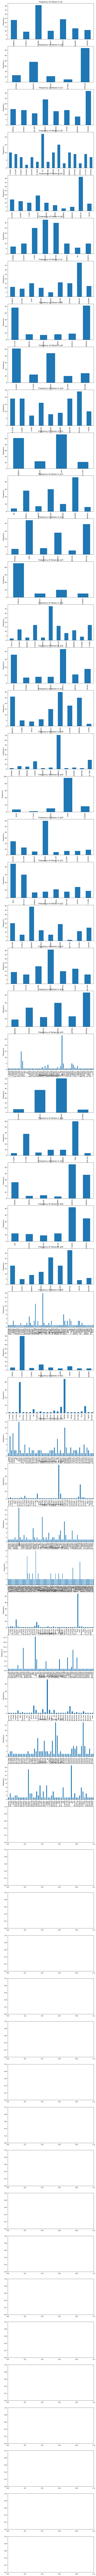

In [70]:
import matplotlib.pyplot as plt
# List of columns to iterate through
columns_to_plot = df.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Iterate through columns and plot bar charts
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Frequency of Values in {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()